# Error interference

Reference:
- [Destructive Error Interference in Product-Formula Lattice Simulation](http://arxiv.org/abs/1912.11047)
- [First-Order Trotter Error from a Second-Order Perspective](http://arxiv.org/abs/2107.08032)
- [Self-healing of Trotter error in digital adiabatic state preparation](http://arxiv.org/abs/2209.06242)

In [2]:
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *
# from plot_config import *

mpl.rcParams['font.family'] = 'sans-serif'  # 'Helvetica'  sans-serif

## TFI model: H=A+B (Parity and XZ)

In [3]:
prefix, suffix = "TFI", "PF1_AB" 
n = 6
r = 10000
J, h = 1, 0.2 
tfI = Nearest_Neighbour_1d(n=n, Jz=J, hx=h, pbc=True)
print('Parity grouping: \n', tfI.ham_par)
print('XYZ grouping: \n', tfI.ham_xyz)

Parity grouping: 
 [SparsePauliOp(['IIIIZZ', 'IIZZII', 'ZZIIII', 'IIIIIX', 'IIIXII', 'IXIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j]), SparsePauliOp(['IIIZZI', 'IZZIII', 'ZIIIIZ', 'IIIIXI', 'IIXIII', 'XIIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j])]
XYZ grouping: 
 [SparsePauliOp(['IIIIIX', 'IIIIXI', 'IIIXII', 'IIXIII', 'IXIIII', 'XIIIII'],
              coeffs=[0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j]), SparsePauliOp(['IIIIZZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZZIIII', 'ZIIIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])]


In [4]:
t_list = np.logspace(1, 3.2, 50)
emp_err_list_xz, bnd_err_list_xz = [], []
emp_err_list_eo, bnd_err_list_eo = [], []

h_list_eo = tfI.ham_par
h_list_xz = tfI.ham_xyz
for index, t in enumerate(t_list):
    # if index % int(len(t_list)/4) == 0: print(index) 
    # else: print('+', end='')
    exact_U = expH(tfI.ham, t)
    appro_U_par = pf(h_list_eo, t, r, order=1)
    emp_err_list_eo.append(norm(exact_U - appro_U_par, ord=2))
    # bnd_err_list_eo.append(tight_bound([term.to_matrix() for term in h_list_eo], 1, t, r))

    appro_U_xyz = pf(h_list_xz, t, r, order=1)
    emp_err_list_xz.append(norm(exact_U - appro_U_xyz, ord=2))
    # bnd_err_list_xz.append(tight_bound([term.to_matrix() for term in h_list_xz], 1, t, r))

Slope (a): 1.0381845365409454 ; Intercept (b): -8.840227825336614
Slope (a): 2.8657357359903104 ; Intercept (b): -20.05670200851677
title: <<PF1, TFI (J=1, h=0.2), r=10000>>


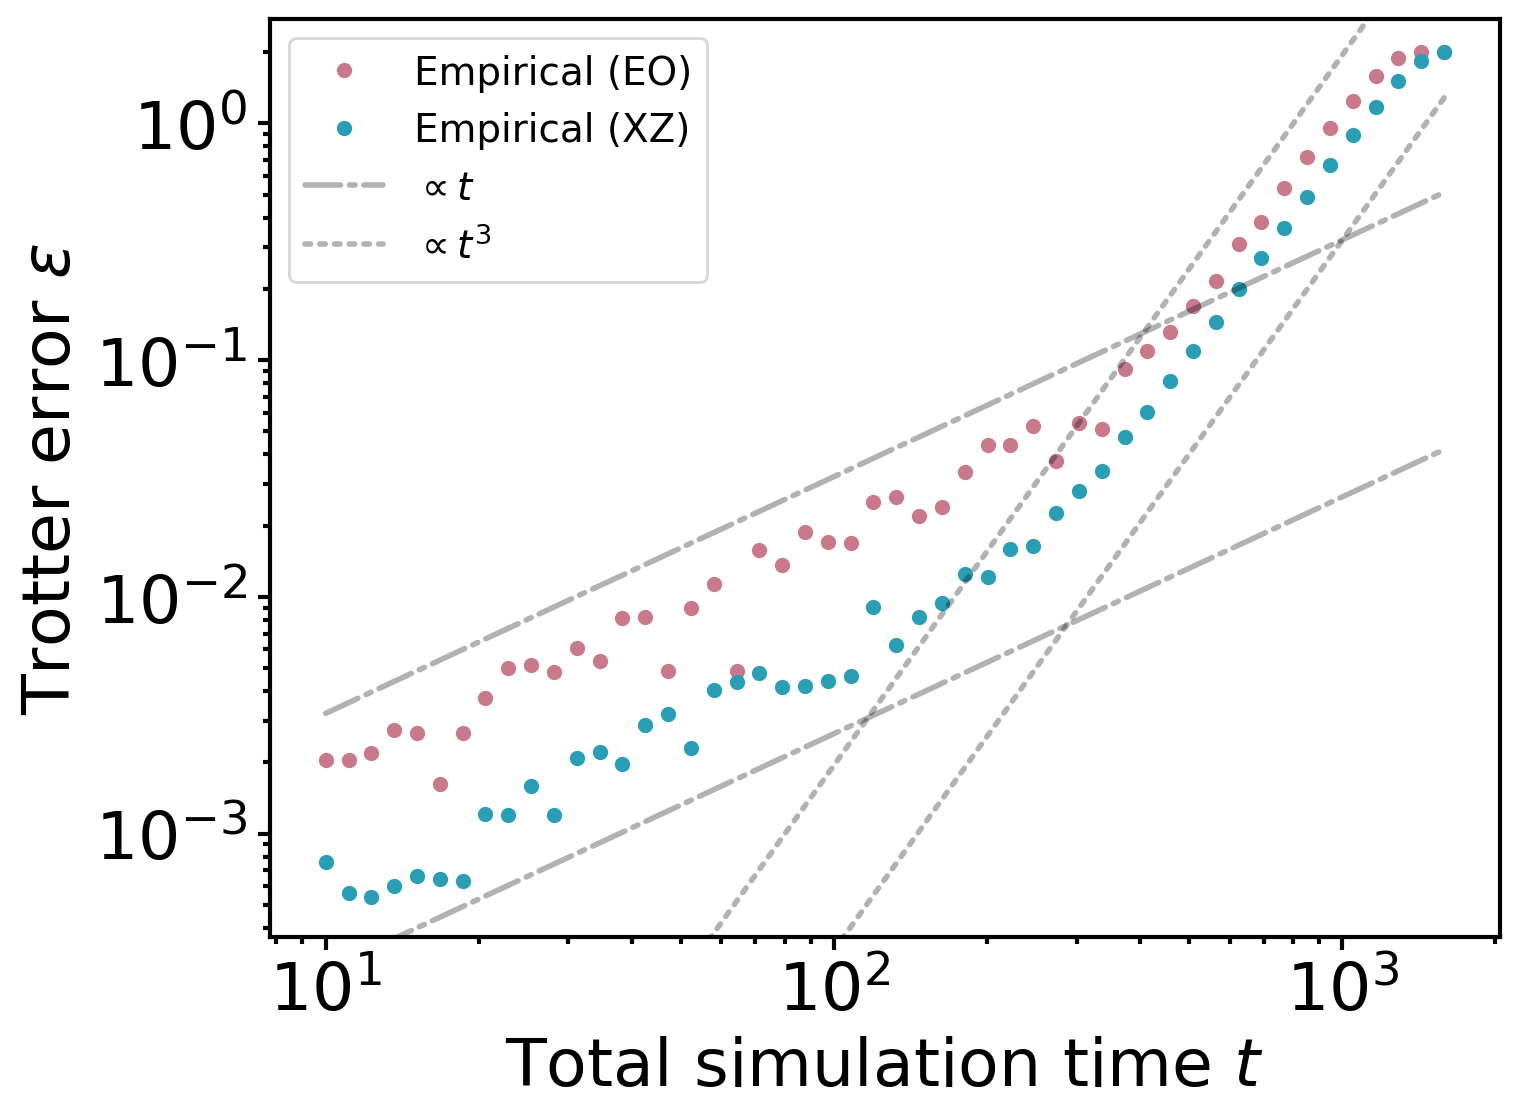

In [5]:
plt.rc('font', size=MEDIUM_SIZE+2)  # controls default text sizes
plt.rc('legend', fontsize=MEDIUM_SIZE-4) 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

start1, end1 = int(2*len(t_list)/10), int(5*len(t_list)/10)
start2, end2 = int(7*len(t_list)/10), int(9*len(t_list)/10)
_, a_1, b_1 = linear_loglog_fit(t_list[start1:end1], emp_err_list_eo[start1:end1], verbose=True)
_, a_2, b_2 = linear_loglog_fit(t_list[start2:end2], emp_err_list_xz[start2:end2], verbose=True)

# _, a_bnd, b_bnd = linear_loglog_fit(t_list, bnd_err_list_eo, verbose=True)
# ax.plot(t_list, bnd_err_list_eo, '*', label='Bound (EO)', markeredgewidth=0.0, c='#C87A8AFF')
# ax.plot(t_list, bnd_err_list_xz, '*', label='Bound (XZ)', markeredgewidth=0.0, c='#2A9EB5FF')
# ax.plot(t_list, [t**2*exp(b_bnd+1) for t in t_list], 'k--', linewidth=2, alpha=0.3, label=fr'$\propto t^2$')
# ax.plot(t_list, [t**2*exp(b_bnd-.5) for t in t_list], 'k--', linewidth=2, alpha=0.3)

ax.plot(t_list, emp_err_list_eo, '.', label='Empirical (EO)', markeredgewidth=0.0, c='#C87A8AFF')
ax.plot(t_list, emp_err_list_xz, '.', label='Empirical (XZ)', markeredgewidth=0.0, c='#2A9EB5FF')
ax.plot(t_list, [t*exp(b_1+0.8) for t in t_list], 'k-.', linewidth=2, alpha=0.3, label=fr'$\propto t$')
ax.plot(t_list, [t*exp(b_1-1.7) for t in t_list], 'k-.', linewidth=2, alpha=0.3)
ax.plot(t_list, [t**3*exp(b_2-0) for t in t_list], 'k:', linewidth=2, alpha=0.3, label=fr'$\propto t^3$')
ax.plot(t_list, [t**3*exp(b_2-1.8) for t in t_list], 'k:', linewidth=2, alpha=0.3)
ax_set_text(ax, r'Total simulation time $t$', r'Trotter error $\epsilon$', log='xy', ylim=[min(emp_err_list_xz)*0.8, max(emp_err_list_xz)*1.2], legend='best')
title = f'PF1, TFI (J={J}, h={h}), r={r}'
print(f'title: <<{title}>>')